In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#To save the model

import joblib

In [3]:
df=pd.read_csv("synthetic_patients_large.csv")
df.head()

,Patient_ID,Age,Gender,Symptoms,Systolic_BP,Diastolic_BP,Heart_Rate,Temperature,Pre_Existing_Conditions,Risk_Level,Department
0,1,67,F,Shortness of Breath,97,68,96,37.2,Heart Disease,Low,Emergency
1,2,95,M,"Chest Pain,Cough,Dizziness",174,92,106,36.3,NaN,High,Cardiology
2,3,14,F,Cough,147,99,71,39.7,Heart Disease,High,General Medicine
3,4,6,M,Shortness of Breath,150,109,81,38.9,Asthma,High,Emergency
4,5,55,F,"Chest Pain,Shortness of Breath",171,112,80,37.5,Asthma,High,Cardiology


In [79]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2000 non-null   int64  
 1   Gender        2000 non-null   object 
 2   Systolic_BP   2000 non-null   int64  
 3   Diastolic_BP  2000 non-null   int64  
 4   Heart_Rate    2000 non-null   int64  
 5   Temperature   2000 non-null   float64
 6   Symptoms      2000 non-null   object 
 7   Risk_Level    2000 non-null   object 
 8   Department    2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


,Age,Systolic_BP,Diastolic_BP,Heart_Rate,Temperature
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,56.474500,136.455000,82.417000,93.899000,99.275350
std,20.741419,29.764121,12.600099,25.886867,1.796188
min,18.000000,110.000000,70.000000,60.000000,98.000000
25%,39.000000,117.000000,74.000000,72.000000,98.300000
50%,58.000000,124.000000,79.000000,86.000000,98.600000
75%,74.000000,160.000000,84.000000,113.000000,98.900000
max,90.000000,220.000000,120.000000,160.000000,105.000000


In [80]:
df.isna().sum()

Age             0
Gender          0
Systolic_BP     0
Diastolic_BP    0
Heart_Rate      0
Temperature     0
Symptoms        0
Risk_Level      0
Department      0
dtype: int64

In [81]:
df["Risk_Level"].value_counts()

Risk_Level
Low       978
Medium    521
High      501
Name: count, dtype: int64

In [82]:
df.dtypes

Age               int64
Gender           object
Systolic_BP       int64
Diastolic_BP      int64
Heart_Rate        int64
Temperature     float64
Symptoms         object
Risk_Level       object
Department       object
dtype: object

In [83]:
df=df.drop("Department",axis=1)

In [84]:
#Mapping low->0, medium->1, high->2

df["Risk_Level"]=df["Risk_Level"].map({
    "Low":0,
    "Medium":1,
    "High":2
})

In [85]:
df.dtypes

Age               int64
Gender           object
Systolic_BP       int64
Diastolic_BP      int64
Heart_Rate        int64
Temperature     float64
Symptoms         object
Risk_Level        int64
dtype: object

In [86]:
X=df.drop("Risk_Level",axis=1) #Input features
Y=df["Risk_Level"] #Output/target

In [87]:
categorical_cols=["Gender","Symptoms"]
encoder=OneHotEncoder(drop="first",sparse_output=False)
encoded_data=encoder.fit_transform(X[categorical_cols])

In [88]:
#Convert the encoded data into a dataframe
encoded_df=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out(categorical_cols))

In [89]:
X=X.drop(columns=categorical_cols)

In [90]:
X = pd.concat(
    [X.reset_index(drop=True),
     encoded_df.reset_index(drop=True)],
    axis=1
)

In [91]:
X.head()
X.dtypes

Age                                int64
Systolic_BP                        int64
Diastolic_BP                       int64
Heart_Rate                         int64
Temperature                      float64
Gender_Male                      float64
Symptoms_Chest Pain              float64
Symptoms_Cough                   float64
Symptoms_Difficulty Breathing    float64
Symptoms_Dizziness               float64
Symptoms_High Fever              float64
Symptoms_Joint Pain              float64
Symptoms_Mild Headache           float64
Symptoms_Numbness                float64
Symptoms_Palpitations            float64
Symptoms_Severe Headache         float64
Symptoms_Shivering               float64
Symptoms_Shortness of Breath     float64
Symptoms_Skin Rash               float64
Symptoms_Slurred Speech          float64
dtype: object

Logistic Regression:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       114
           2       1.00      1.00      1.00        94

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



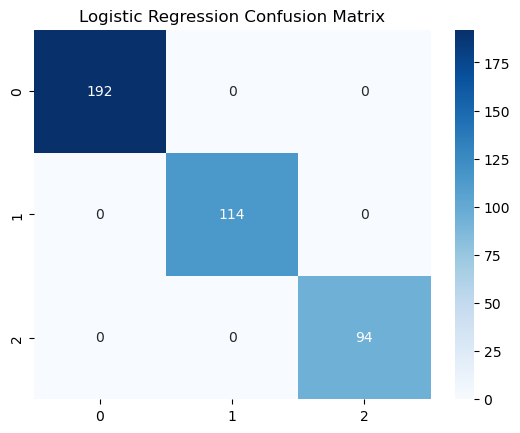

Random Forest Classifier:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       114
           2       1.00      1.00      1.00        94

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



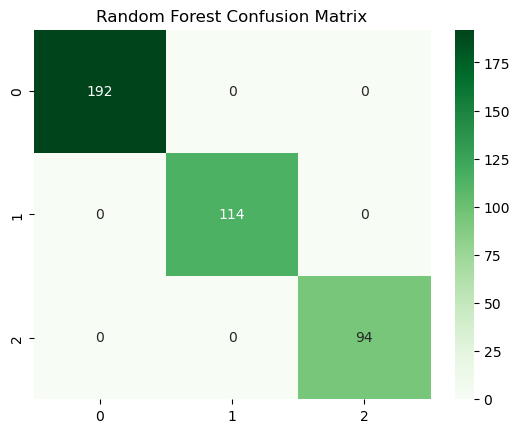

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# --- Logistic Regression ---
print("Logistic Regression:")
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, Y_train)
Y_pred_1 = model1.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred_1))
print(classification_report(Y_test, Y_pred_1))

# Optional: Confusion matrix
cm1 = confusion_matrix(Y_test, Y_pred_1)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# --- Random Forest ---
print("Random Forest Classifier:")
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, Y_train)
Y_pred_2 = model2.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred_2))
print(classification_report(Y_test, Y_pred_2))

# Optional: Confusion matrix
cm2 = confusion_matrix(Y_test, Y_pred_2)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [94]:
import joblib
import os

# Create a folder to store models if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save both models
joblib.dump(model1, "models/logistic_model.pkl")
joblib.dump(model2, "models/random_forest_model.pkl")

# Save the column order used for training (important for new patient data)
joblib.dump(X_train.columns, "models/model_columns.pkl")

print("Models saved successfully!")



Models saved successfully!
